---
# Advanced Financial Econometrics
## PhD seminar reading group

#### Winter Semester 2019/2020

#### Week 5 (Nov 20 2019): Chapter 7

by Matej Nevrla

<img src="images/pivo.png" width="40%">

---

A central problem in machine learning is how to make an algorithm that will perform well not just on the training data, but also on **new inputs** (generalization). Many strategies used in machine learning are explicitly designed to reduce the test error, possibly at the expense of increased training error - **regularization**.

<img src="images/tradeoff.png" width="40%">

_Idea_: **modify the learning algorithm** to reduce the generalization error but not the training error.

_Strategies:_

1. Extra **constraints** on a machine learning model (e.g., restrictions on the parameter values)
2. Extra **terms in the objective function** (corresponding to a soft constraint on the parameter values)
3. **Ensemble methods**: combine multiple hypotheses that explain the training data

_Notes:_

- Sometimes these constraints and penalties are designed to encode specific kinds of prior knowledge
- Other times, these constraints and penalties are designed to express a generic preference for a simpler model class in order to promote generalization
- Sometimes penalties and constraints are necessary to make an underdetermined problem determined
- Regularization of an estimator works by trading increased bias for reduced variance.
- Deep learning algorithms are typically applied to extremely complicated domains such as images, audio sequences and text, for which the true generation process essentially involves simulating the entire universe. Instead, we might find—and indeed in practical deep learning scenarios, we almost always do find—that the best fitting model (in the sense of minimizing generalization error) is a large model that has been regularized appropriately.

---

## 1. Parameter Norm Penalties

Based on adding a parameter norm penalty $\Omega(\boldsymbol{\theta})$ to the objective function $J$. We denote the regularized objective function by $\tilde{J}$:

$$
\tilde{J}(\boldsymbol{\theta}; \bf{X}, \bf{y}) = J(\boldsymbol{\theta}; \bf{X}, \bf{y}) + \alpha \Omega(\bf{\theta})
$$

where $\alpha \in [0, \infty]$ is a hyperparameter that weights the relative contribution of the norm penalty term. Setting $\alpha$ to 0 results in no regularization. Larger values of $\alpha$ correspond to more regularization.

We typically choose to use a parameter norm penalty $\Omega$ that penalizes only the weights of the affine transformation at each layer and leaves the _biases unregularized_. The biases typically require less data to fit accurately than the weights - we do not induce too much variance by leaving the biases unregularized. Also, regularizing the bias parameters can introduce a significant amount of _underfitting_.

It is reasonable to use the same weight decay at all layers just to reduce the size of search space.

### 1.1 $L^2$ Parameter Regularization

__Also known as__:

- weight decay
- ridge regression
- Tikhonov regularization

__Regularization term__: $\Omega(\boldsymbol{\theta}) = \frac{1}{2} \Vert \bf{w} \Vert_2^2$

Total objective function is then:

$$
\tilde{J}(\boldsymbol{\theta}; \bf{X}, \bf{y}) = J (\boldsymbol{\theta}; \bf{X}, \bf{y}) + \frac{\alpha}{2} \bf{w}^T \bf{w} 
$$

Step within the gradient descent algorithm is:

$$
\bf{w} \leftarrow (1 - \epsilon \alpha) \bf{w} - \epsilon \nabla_w J(\boldsymbol{\theta}; \bf{X}, \bf{y})
$$

Applyying second-order approximation of the objective $J(\boldsymbol{\theta})$ around the point of its minimum $\bf{w}^*$, we obtain location of the minimum of the total ojective function:

$$
\bf{\tilde{w}} = (\bf{H} + \alpha \bf{I}^{-1}) \bf{H} \bf{w}^* ,
$$

where $\bf{H}$ is Hessian matrix of $J$ evaluated at point $\bf{w}^*$, which is positive semidefinite. This can be expressed in terms of decomposed Hessian matrix $\bf{H}$:

$$
\bf{\tilde{w}} = \bf{Q}(\boldsymbol{\Lambda} + \alpha \bf{I})^{-1} \boldsymbol{\Lambda} \bf{Q}^T \bf{w}^*.
$$

We see that the effect of weight decay is to rescale $\bf{w}^*$ along the axes defined by the eigenvectors of $\bf{H}$. Specifically, the component of $\bf{w}^*$ that is aligned with the _i_-th eigenvector of $\bf{H}$ is rescaled by a factor of $\frac{\lambda_i}{\lambda_i + \alpha}$.

For example, in case of **linear regression**, this changes the normal equation for the solution to

$$
\bf{w} = (\bf{X}^T \bf{X} + \alpha \bf{I})^{-1} \bf{X}^T \bf{y}.
$$

<img src="images/l2.png" width="40%">

_Notes:_
- $L^2$ regularization is equivalent to maximum a posteriori (MAP) Bayesian inference with a **Gaussian prior** on the weights.
- Weight decay leads to the **shrinkage** of the parameters towards zero.

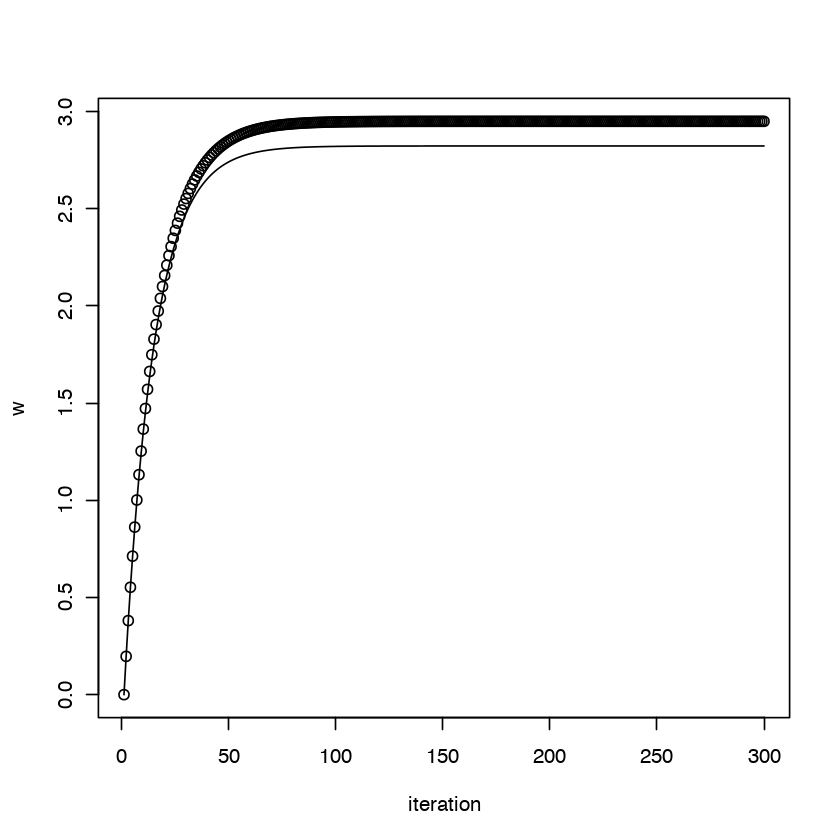

In [6]:
GradSimple = function(w, x, y) {
    return(-2 * sum(x * y) + 2 * sum(x * x * w))
}

GradTotal = function(alpha, w, x, y) {
    alpha * w + GradSimple(w, x, y)
}

Loss = function(x, y, w) {
    return(sum((y - x * w)^2))
}

n_length = 100

set.seed(45)
x = runif(n_length)
e = rnorm(n_length)
y = 3 * x + e

n_iter = 300
w_vec = rep(0, n_iter)

epsilon = 0.001
alpha = 3

for (i in 1:(n_iter - 1)) {
    w_vec[i+1] = (1 - epsilon * alpha) * w_vec[i] - epsilon * GradSimple(w_vec[i], x, y)
}

w_l1 = w_vec

for (i in 1:(n_iter - 1)) {
    w_vec[i+1] = w_vec[i] - epsilon * GradSimple(w_vec[i], x, y)
}

plot(w_vec, xlab = 'iteration', ylab = 'w')
lines(w_l1)

### 1.2 $L^1$ Parameter Regularization

__Regularization term__: $\Omega(\boldsymbol{\theta}) = \Vert w \Vert_1 = \sum_{i} \vert w_i \vert$

The total loss function is:

$$
\tilde{J}(\boldsymbol{\theta}; \bf{X}, \bf{y}) = J (\boldsymbol{\theta}; \bf{X}, \bf{y}) + \alpha \Vert \bf{w} \Vert_1 
$$

and the corresponding sub-gradient:

$$
\nabla_w \tilde{J}(\boldsymbol{\theta}; \bf{X}, \bf{y}) = \alpha \textrm{sign} (\bf{w}) + \nabla_w J(\boldsymbol{\theta}; \bf{X}, \bf{y})
$$

We can see that the regularization contribution to the gradient no longer scales linearly with each $w_i$; instead it is a constant factor with a sign equal to $\textrm{sign}(\textbf{w}_i)$. One consequence of this form of the gradient is that we will not necessarily see clean algebraic solutions to quadratic approximations of $J(\bf{X},\bf{y};\bf{w})$ as we did for $L^22$ regularization.

If the Hessian matrix of $J$ with respect ot $\bf{w}$ evalueated at $\bf{w}^*$ is diagonal (can be acheived via PCA), our quadratic approximation of the $L^1$ regularized objective function decomposes into a sum over the parameters:

$$
\hat{J} (\bf{w}; \bf{X}, \bf{y}) = J (\bf{w}^*; \bf{X}, \bf{y}) + \sum_i \Big[ \frac{1}{2} H_{i,i} (w_i - w_i^*)^2 + \alpha \vert w_i \vert \Big]
$$

and the minimization problem of this approximate cost function has an analytical solution with the following form:

$$
w_i = \textrm{sign}(w_i^*) \textrm{max} \Big\{ \vert w_i^* \vert - \frac{\alpha}{H_{i,i}}, 0 \Big\}
$$

Consider the situation where $w_i^* > 0$ for all $i$. There are two possible outcomes:

1. The case where $w_i^* \leq \frac{\alpha}{H_{i,i}}$. Here the optimal value of $w_i$ under the regularized objective is simply $w_i = 0$. This occurs because the contribution of $J(\bf{w};\bf{X},\bf{y})$ to the regularized objective $\tilde{J}(\bf{w};\bf{X},\bf{y})$ is overwhelmed in direction $i$ by the $L^1$ regularization which pushes the value of $w_i$ to zero.
2. The case where $w_i^* > \frac{\alpha}{H_{i,i}}$. In this case, the regularization does not move the optimal value of $w_i$ to zero but instead it just shifts it in that direction by a distance equal to $\frac{\alpha}{H_{i,i}}$. 

_Notes:_
- In comparison to $L^2$ regularization, $L^1$ regularization results in a solution that is more **sparse**. Sparsity in this context refers to the fact that some parameters have an optimal value of zero.
- The sparsity property induced by $L^1$ regularization has been used extensively as a **feature selection** mechanism. Feature selection simplifies a machine learning problem by choosing which subset of the available features should be used.
- In particular, the well known **LASSO** (Tibshirani, 1995) (least absolute shrinkage and selection operator) model integrates an $L^1$ penalty with a linear model and a least squares cost function. The $L^1$ penalty causes a subset of the weights to become zero, suggesting that the corresponding features may safely be discarded.
- For $L^1$ regularization, the penalty used to regularize a cost function is equivalent to the log-prior term that is maximized by MAP Bayesian inference when the prior is an **isotropic Laplace distribution**.

---

## 2. Norm Penalties as Constrained Optimization

Consider the cost function regularized by a parameter norm penalty:

$$
\tilde{J}(\boldsymbol{\theta}; \bf{X}, \bf{y}) = J(\boldsymbol{\theta}; \bf{X}, \bf{y}) + \alpha \Omega(\bf{\theta}) .
$$

Recall that we can minimize a function subject to constraints by constructing a generalized Lagrange function, consisting of the original objective function plus a set of penalties. Each penalty is a product between a coefficient, called a Karush–Kuhn–Tucker (KKT) multiplier, and a function representing whether the constraint is satisfied. If we wanted to constrain $\Omega(\boldsymbol{\theta})$ to be less than some constant $k$, we could construct a generalized Lagrange function

$$
\mathcal{L} (\boldsymbol{\theta}, \alpha; \bf{X}, \bf{y}) = J(\boldsymbol{\theta}; \bf{X}, \bf{y}) + \alpha (\Omega(\bf{\theta}) - k) .
$$

The solution to the constrained problem is given by

$$
\boldsymbol{\theta}^* = \underset{\theta}{\arg\min}  \, \underset{\alpha \geq 0}{\max} \mathcal{L}(\boldsymbol{\theta}, \alpha).
$$

Solving this problem requires modifying both $\boldsymbol{\theta}$ and $\alpha$.

If we fix $\alpha^*$, we can view the problem as just a function of $\boldsymbol{\theta}$:


$$
\boldsymbol{\theta}^* = \underset{\theta}{\arg\min} \mathcal{L}(\boldsymbol{\theta}, \alpha^*) = \underset{\theta}{\arg\min} \, J(\boldsymbol{\theta}; \bf{X}, \bf{y}) + \alpha^* \Omega(\bf{\theta}).
$$


This is exactly the same as the regularized training problem of minimizing $\tilde{J}$. 

_Notes:_

- If $\Omega$ is the $L^2$ norm, then the weights are constrained to lie in an $L^2$ ball.
- If $\Omega$ is the $L^1$ norm, then the weights are constrained to lie in a region of limited $L^1$ norm.
- Usually we do not know the size of the constraint region that we impose by using weight decay with coefficient $\alpha^*$ because the value of $\alpha^*$ does not directly tell us the value of $k$.
- In principle, one can solve for $k$, but the relationship between $k$ and $\alpha^*$ depends on the form of $J$.
- While we do not know the exact size of the constraint region, we can control it roughly by increasing or decreasing $\alpha$ in order to grow or shrink the constraint region. Larger $\alpha$ will result in a smaller constraint region. Smaller $\alpha$ will result in a larger constraint region. Using exlicit constraints can be still desired, if:
    - we have an idea of appropriate value of $k$
    - penalties can cause non-convex optimization procedures to get stuck in local minima corresponding to small $\theta$
    - we want to impose some stability on the optimization procedure

---

## 3. Regularization and Under-Constrained Problems

In some cases, regularization is necessary for machine learning problems to be **properly defined**. Many linear models in machine learning, including linear regression and PCA, depend on inverting the matrix $\textbf{X}^T \textbf{X}$. This is not possible whenever $\bf{X}^T \bf{X}$ is singular. This may be due to:
- no variance in some direction
- fewer examples (rows) than the features (columns)

In this case, many forms of regularization correspond to inverting $\bf{X}^T \bf{X} + \alpha \bf{I}$ instead. This regularized matrix is guaranteed to be invertible.

_Example:_ Logistic regression where the classes are linearly separable: If a weight vector $\bf{w}$ is able to achieve perfect classification, then 2$\bf{w}$ will also achieve perfect classification and higher likelihood. An iterative optimization procedure like stochastic gradient descent will continually increase the magnitude of $\bf{w}$ and, in theory, will never halt. In practice, a numerical implementation of gradient descent will eventually reach sufficiently large weights to cause numerical overflow, at which point its behavior will depend on how the programmer has decided to handle values that are not real numbers.

_Notes:_

- Most forms of regularization are able to guarantee the convergence of iterative methods applied to underdetermined problems. For example, weight decay will cause gradient descent to quit increasing the magnitude of the weights when the slope of the likelihood is equal to the weight decay coefficient.
- The idea of using regularization to solve underdetermined problems extends beyond machine learning. The same idea is useful for several basic linear algebra problems - **Moore-Penrose psedoinverse**.

---

## 4. Dataset Augmentation

The best way to make a machine learning model generalize better is to train it on more data. Of course, in practice, the amount of data we have is limited. One way to get around this problem is to create fake data and add it to the training set.

This approach is easiest for classification. A classifier needs to take a complicated, high dimensional input $x$ and summarize it with a single category identity $y$. This means that the main task facing a classifier is to be invariant to a wide variety of transformations. We can generate new $(\bf{x}, y)$ pairs easily just by transforming the $\bf{x}$ inputs in our training set. This approach is not as readily applicable to many other tasks.

Dataset augmentation has been a particularly effective technique for a specific classification problem: **object recognition**. Images are high dimensional and include an enormous variety of factors of variation, many of which can be easily simulated. Operations like translating the training images a few pixels in each direction can often greatly improve generalization, even if the model has already been designed to be partially translation invariant. One has to be careful when applying the transformations, though.

Dataset augmentation is effective for **speech recognition** tasks as well.

_Injecting noise_ in the input to a neural network (Sietsma and Dow, 1991) can also be seen as a form of data augmentation. For many classification and even some regression tasks, the task should still be possible to solve even if small random noise is added to the input. Neural networks prove **not to be very robust to noise**, however (Tang and Eliasmith, 2010). One way to improve the robustness of neural networks is simply to train them with random noise applied to their inputs.

Often, hand-designed dataset augmentation schemes can dramatically reduce the generalization error of a machine learning technique. To compare the performance of one machine learning algorithm to another, it is necessary to perform controlled experiments. When comparing machine learning algorithm A and machine learning algorithm B, it is necessary to make sure that both algorithms were evaluated using the same hand-designed dataset augmentation schemes.

---

## 5. Noise Robustness

### Input noise augmentation

For some models, the addition of noise with infinitesimal variance at the input of the model is equivalent to imposing a penalty on the norm of the weights (Bishop, 1995a,b). In the general case, it is important to remember that noise injection can be much more powerful than simply shrinking the parameters, especially when the noise is added to the hidden units. Noise applied to the hidden units - **dropout**.

Another way that noise has been used in the service of regularizing models is by adding it to the weights. This technique has been used primarily in the context of recurrent neural networks (Jim et al., 1996; Graves, 2011). This can be interpreted as a stochastic implementation of Bayesian inference over the weights. The Bayesian treatment of learning would consider the model weights to be uncertain and representable via a probability distribution that reflects this uncertainty. Adding noise to the weights is a practical, stochastic way to reflect this uncertainty.

Noise applied to the weights can also be interpreted as equivalent (under some assumptions) to a more traditional form of regularization, encouraging stability of the function to be learned.

$$
J = \mathbb{E}_{p(x,y)} \, [(\hat{y}(\bf{x}) - y)^2]
$$

We now assume that with each input presentation we also include a random perturbation $\epsilon_{W} \sim N (\epsilon; \bf{0}, \eta \bf{I})$ of the network weights.

$$
\tilde{J}_W = \mathbb{E}_{p(x,y, \epsilon_W)} \quad \Big[(\hat{y}_{\epsilon_W} (\bf{x}) - y)^2 \Big]
$$

For small $\eta$, the minimization of $J$ with added weight noise is equivalent to minimization of $J$ with an additional regularization term: $\eta \mathbb{E}_{p(x,y)} \Big[ \Vert \nabla_W \hat{y}(x) \Vert ^2 \Big]$. This form of regularization encourages the parameters to go to regions of parameter space where small perturbations of the weights have a relatively small influence on the output. In other words, it pushes the model into regions where the model is relatively insensitive to small variations in the weights, finding points that are not merely minima, but minima surrounded by flat regions (Hochreiter and Schmidhuber, 1995).

### 5.1 Injecting Noise at the Output Targets

Most datasets have some amount of mistakes in the $y$ labels. It can be harmful to maximize $\log p(y | \bf{x})$ when $y$ is a mistake. One way to prevent this is to explicitly model the noise on the labels. Example: **label smoothing** - replace 0 and 1 by $\frac{\epsilon}{k-1}$ and $1-\epsilon$. The standard cross-entropy loss may then be used with these soft targets. Maximum likelihood learning with a softmax classifier and hard targets may actually never converge—the softmax can never predict a probability of exactly 0 or exactly 1, so it will continue to learn larger and larger weights, making more extreme predictions forever.

---

## 6. Semi-Supervised Learning

In the context of deep learning, semi-supervised learning usually refers to **learning a representation** $h=f(x)$. The goal is to learn a representation so that examples from the same class have similar representations. A linear classifier in the new space may achieve better generalization in many cases (Belkin and Niyogi, 2002; Chapelle et al., 2003). A long-standing variant of this approach is the application of principal components analysis as a pre-processing step before applying a classifier (on the projected data).

instead of having separate unsupervised and supervised components in the model, one can construct models in which a generative model of either $P (x)$ or $P(x,y)$ shares parameters with a discriminative model of $P(y | x)$. One can then trade-off the supervised criterion $−logP(y | x)$ with the unsupervised or generative one (such as $−logP(x)$ or $−logP(x,y)$). The generative criterion then expresses a particular form of prior belief about the solution to the supervised learning problem (Lasserre et al., 2006), namely that the structure of $P(x)$ is connected to the structure of $P(y | x)$ in a way that is captured by the shared parametrization.

_Example:_ Salakhutdinov and Hinton (2008) describe a method for learning the kernel function of a kernel machine used for regression, in which the usage of unlabeled examples for modeling $P (x)$ improves $P (y | x)$ quite significantly.

---

## 7. Multi-Task Learning

**Idea**:  _Among the factors that explain the variations observed in the data associated with the different tasks, some are shared across two or more tasks._

Multi-task learning (Caruana, 1993) is a way to improve generalization by **pooling the examples** (which can be seen as soft constraints imposed on the parameters) **arising out of several tasks**. In the same way that additional training examples put more pressure on the parameters of the model towards values that generalize well, when part of a model is shared across tasks, that part of the model is more constrained towards good values (assuming the sharing is justified), often yielding better generalization.

Different supervised tasks (predicting $y^{(i)}$ given $\bf{x}$) share the same input $\bf{x}$, as well as some intermediate-level representation $\bf{h}^{(shared)}$ capturing a common pool of factors. The model can generally be divided into two kinds of parts and associated parameters:

1. Task-specific parameters
2. Generic parameters, shared across all the tasks

<img src="images/multi.png" width="20%">

Improved generalization and generalization error bounds (Baxter, 1995) can be achieved because of the shared parameters, for which statistical strength can be greatly improved (in proportion with the increased number of examples for the shared parameters, compared to the scenario of single-task models). Of course this will happen only if some assumptions about the statistical relationship between the different tasks are valid, meaning that there is something shared across some
of the tasks.

---

## 8. Early Stopping

When training large models with sufficient representational capacity to overfit the task, we often observe that training error decreases steadily over time, but validation set error begins to rise again. See the Figure.

    <img src="images/stop1.png" width="40%">

We can obtain a model with better validation set error (and thus, hopefully better test set error) by returning to the parameter setting at the point in time with the lowest validation set error.

It is probably the most commonly used form of regularization in deep learning - due its **effectiveness** and its **simplicity**.

<img src="images/stop2.png" width="40%">

_Notes:_

- One way to think of early stopping is as a very efficient **hyperparameter selectio**n algorithm. In this view, the number of training steps is just another hyperparameter.
- Only a single run of training is needed (plus evaluation on validation set) vs. most hyperparameters must be chosen using an expensive guess and check process
- Early stopping does not damage the learning dynamics vs. weight decay which can trap the network in a bad local minimum
- One can perform extra training after the initial training with early stopping has completed. In the second, extra training step, all of the training data is included. There are two basic strategies one can use for this second training procedure.
    - One strategy (algorithm 7.2) is to initialize the model again and retrain on all of the data. In this second training pass, we train for the same number of steps as the early stopping procedure determined was optimal in the first pass. See the algorithm:

    <img src="images/stop3.png" width="40%">

    - Another strategy for using all of the data is to keep the parameters obtained from the first round of training and then continue training but now using all of the data. At this stage, we now no longer have a guide for when to stop in terms of a number of steps. Instead, we can monitor the average loss function on the validation set, and continue training until it falls below the value of the training set objective at which the early stopping procedure halted.
     
    <img src="images/stop4.png" width="40%">

### 8.1 Early stopping as a regularizer

Stopping has the effect of restricting the optimization procedure to a relatively small volume of parameter space in the neighborhood of the initial parameter value $\boldsymbol{\theta}_0$, as illustrated in the figure

<img src="images/stop5.png" width="40%">

More specifically, imagine taking $\tau$ optimization steps (corresponding to $\tau$ training iterations) and with learning rate $\epsilon$. We can view the product $\tau \epsilon$ as a measure of **effective capacity** - reciprocal of the coefficient used for weight decay.

We can show how — in the case of a simple linear model with a quadratic error function and simple gradient descent — early stopping is equivalent to $L^2$ regularization. After few approximation steps, we can reach the conclusion that the penalty parameter $\alpha$ is related to the $\tau$ and $\epsilon$ as $\alpha \approx \frac{1}{\tau \epsilon}$.
